In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
def evaluate_model(y_test, y_pred):
  test_r2 = r2_score(y_test, y_pred)
  test_mae = mean_absolute_error(y_test, y_pred)
  test_mse = mean_squared_error(y_test, y_pred)
  test_rmse = np.sqrt(test_mse)

  print("R2: {}".format(test_r2))
  print("MAE: {}".format(test_mae))
  print("MSE: {}".format(test_mse))
  print("RMSE: {}".format(test_rmse))

# Decision Tree and Random Forest Regression

In this exercise, we will use Decision Tree and Random Forest regression to predict rent prices in Madrid, using a dataset from Idealista, given a number of features.

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Loading the dataset

In [3]:
dataset = pd.read_csv('madrid_idealista.csv')

## Inspect the Data Structure

In [4]:
dataset.head()

,Address,Price,Rooms,Squared_meters,Floor,Link,Summary,Distric,Type,Pool,Furniture,Exterior,Elevator
0,"calle Aguarón, Valdemarín, Madrid",900.0,NaN,55,2,www.idealista.com/inmueble/98588378/,\nChrystie & Didie ofrece en Exclusiva. Loft m...,Chamartin,Studio,False,False,True,True
1,"calle de Luisa Fernanda, Argüelles, Madrid",700.0,NaN,50,4,www.idealista.com/inmueble/91350410/,\nDisponible a principios de septiembre. Alqui...,Chamartin,Studio,False,False,False,True
2,"calle de Irún, Argüelles, Madrid",900.0,NaN,73,2,www.idealista.com/inmueble/98145156/,"\nExcelente estudio, junto a la estación de Pr...",Chamartin,Studio,False,False,True,True
3,"avenida del Doctor Federico Rubio y Galí, 88, ...",850.0,NaN,41,0,www.idealista.com/inmueble/98614584/,\nSe alquila estudio amueblado de 40 m2 recién...,Chamartin,Studio,False,True,True,True
4,"Valdemarín, Madrid",795.0,NaN,42,1,www.idealista.com/inmueble/97899849/,\nARAVACA-VALDEMARIN.\nExclusivo Loft de 40 M2...,Chamartin,Studio,False,False,True,True


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         517 non-null    object 
 1   Price           517 non-null    float64
 2   Rooms           430 non-null    float64
 3   Squared_meters  517 non-null    int64  
 4   Floor           517 non-null    int64  
 5   Link            517 non-null    object 
 6   Summary         517 non-null    object 
 7   Distric         517 non-null    object 
 8   Type            517 non-null    object 
 9   Pool            517 non-null    bool   
 10  Furniture       517 non-null    bool   
 11  Exterior        517 non-null    bool   
 12  Elevator        517 non-null    bool   
dtypes: bool(4), float64(2), int64(2), object(5)
memory usage: 38.5+ KB


In [6]:
dataset["Distric"].value_counts()
dataset["Type"].value_counts()

Flat      379
Studio     87
Attic      27
Duplex     24
Name: Type, dtype: int64

In [7]:
dataset.describe()

,Price,Rooms,Squared_meters,Floor
count,517.000000,430.000000,517.000000,517.000000
mean,867.226306,1.509302,55.870406,2.110251
std,91.485379,0.747120,14.381857,1.659315
min,500.000000,1.000000,16.000000,0.000000
25%,800.000000,1.000000,47.000000,1.000000
50%,900.000000,1.000000,55.000000,2.000000
75%,945.000000,2.000000,65.000000,3.000000
max,995.000000,4.000000,98.000000,6.000000


## How to handle bool types?

In [8]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
labelbinarizer = LabelBinarizer()

labelbinarizer.fit([False, True])

dataset['Pool'] = labelbinarizer.transform(dataset['Pool'])
dataset['Exterior'] = labelbinarizer.transform(dataset['Exterior'])
dataset['Furniture'] = labelbinarizer.transform(dataset['Furniture'])
dataset['Elevator'] = labelbinarizer.transform(dataset['Elevator'])

dataset.describe()

,Price,Rooms,Squared_meters,Floor,Pool,Furniture,Exterior,Elevator
count,517.000000,430.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.0
mean,867.226306,1.509302,55.870406,2.110251,0.065764,0.117988,0.725338,1.0
std,91.485379,0.747120,14.381857,1.659315,0.248109,0.322907,0.446776,0.0
min,500.000000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,800.000000,1.000000,47.000000,1.000000,0.000000,0.000000,0.000000,1.0
50%,900.000000,1.000000,55.000000,2.000000,0.000000,0.000000,1.000000,1.0
75%,945.000000,2.000000,65.000000,3.000000,0.000000,0.000000,1.000000,1.0
max,995.000000,4.000000,98.000000,6.000000,1.000000,1.000000,1.000000,1.0


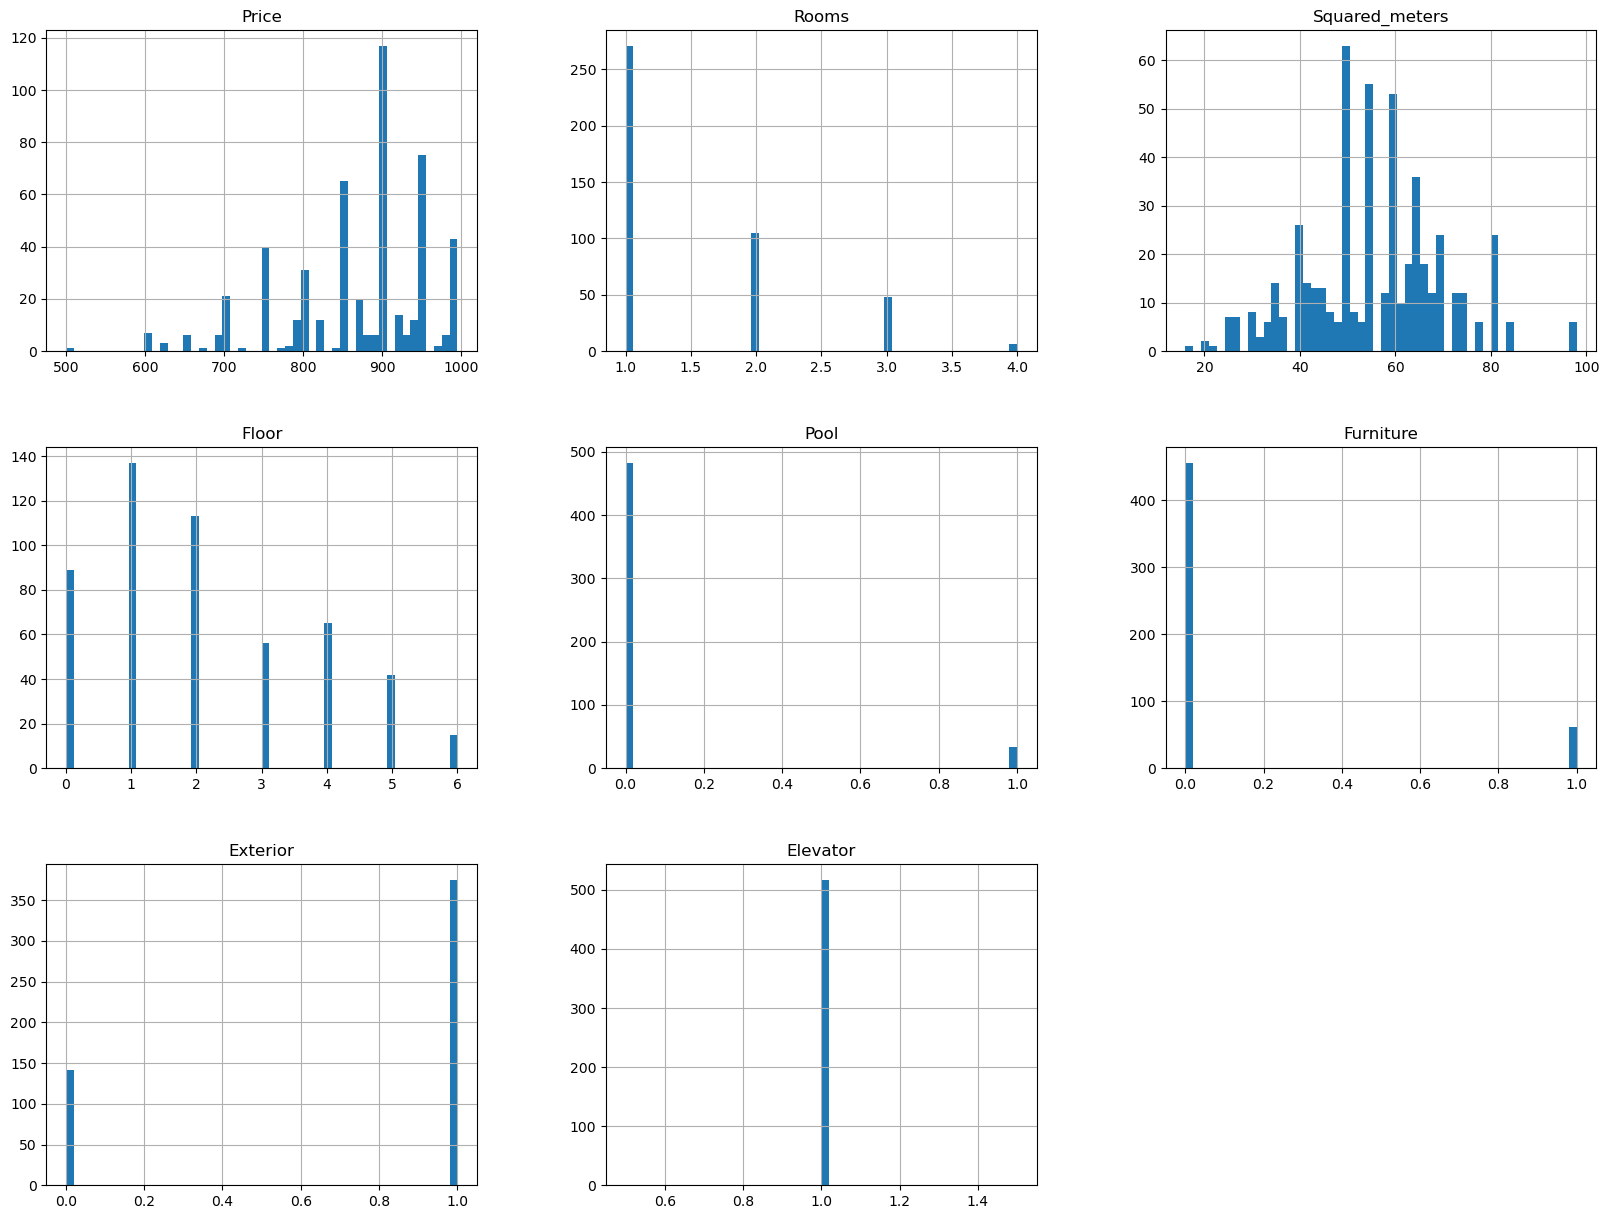

In [9]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
plt.show()

## Data cleaning

In [10]:
dataset.info()

incomplete_rows = dataset[dataset.isnull().any(axis=1)].head()

incomplete_rows

print(incomplete_rows)

# In this cases we can do the following
#dataset = dataset.dropna(subset=["Rooms"])    # option 1 remove entries
#dataset = dataset.drop("Rooms", axis=1)      # option 2 remove column
median = dataset["Rooms"].median()           # option 3 replace with median

dataset["Rooms"].fillna(median, inplace=True)

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         517 non-null    object 
 1   Price           517 non-null    float64
 2   Rooms           430 non-null    float64
 3   Squared_meters  517 non-null    int64  
 4   Floor           517 non-null    int64  
 5   Link            517 non-null    object 
 6   Summary         517 non-null    object 
 7   Distric         517 non-null    object 
 8   Type            517 non-null    object 
 9   Pool            517 non-null    int64  
 10  Furniture       517 non-null    int64  
 11  Exterior        517 non-null    int64  
 12  Elevator        517 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 52.6+ KB
                                             Address  Price  Rooms  \
0                  calle Aguarón, Valdemarín, Madrid  900.0    NaN   
1         calle d

## Handling Text and Categorical Attributes

In [11]:
type_cat = dataset[["Type"]]
type_cat[:10]

,Type
0,Studio
1,Studio
2,Studio
3,Studio
4,Studio
5,Studio
6,Studio
7,Studio
8,Studio
9,Studio


In [12]:
dataset["Distric"].unique()

array(['Chamartin', 'Chueca', 'La Latina', 'Lavapies', 'Malasaña',
       'Moncloa'], dtype=object)

In [13]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
type_cat_1hot = cat_encoder.fit_transform(type_cat)
type_cat_1hot

<517x4 sparse matrix of type '<class 'numpy.float64'>'
	with 517 stored elements in Compressed Sparse Row format>

In [14]:
cat_encoder.categories_

[array(['Attic', 'Duplex', 'Flat', 'Studio'], dtype=object)]

## Select dependent and independent variables

In [15]:
feature_cols = ['Rooms', 'Squared_meters', 'Floor', 'Type', 'Pool', 'Furniture',
                    'Exterior', 'Elevator', 'Distric']

X = dataset[feature_cols]  # Features
y = dataset['Price']  # Target variable

## Apply one hot encoder to data

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cat_attribs = ["Type", "Distric"]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cat_attribs)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

---



In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

 ## Inspecting the intercept (constant) and the coefficients (slopes)

In [19]:
intercept = regressor.intercept_
print("Intercept: {}".format(intercept))

coefficient = regressor.coef_
print("coefficient: {}".format(coefficient))

Intercept: 764.5767269062741
coefficient: [ 46.56031604 -35.04153907  14.14441745 -25.66319442   3.60605977
   0.78822361  -1.94987185  -9.91604144  -2.05751109   9.52914101
 -13.32399398   2.58139297  -2.84709732  58.38252572   5.78054798
 -39.16450325   0.        ]


## Predicting the Test set results

In [20]:
y_pred = regressor.predict(X_test)
print(y_pred)

[819.06610457 865.46901583 885.01492292 873.65006313 911.51569751
 798.83091857 879.05735154 887.79826894 860.04052554 914.2910863
 815.73307561 896.35119114 926.51916347 877.66262341 834.64362498
 807.57183597 824.28620224 907.830204   876.31925608 892.8097301
 813.54481185 945.07106734 939.75692849 847.82815697 897.658427
 852.82639272 859.25648589 888.09055288 813.08101674 816.2829073
 788.12665352 857.45913257 842.12212767 913.61219863 876.21161684
 876.31925608 923.46975914 856.14761136 907.07967549 866.88142084
 895.45464786 914.92846718 834.44147356 875.23255523 868.35308649
 841.82577141 901.98715467 860.87053962 923.02615042 858.29321896
 895.495931   864.1405222  881.8751877  834.52927354 846.90482968
 846.87685744 832.23659491 823.4956775  894.16701617 930.7117905
 879.02809038 882.16747164 855.20696875 907.30134941 920.20831425
 908.73515468 906.16819613 876.21161684 852.79993867 867.27333943
 850.24499975 926.46990785 760.34646723 902.02554652 898.87443702
 821.91456451 92

## Evaluating the model with R2, MAE, MSE and RMSE

In [21]:
evaluate_model(y_test, y_pred)

R2: 0.12730929789910905
MAE: 69.68080260070798
MSE: 6944.884145296923
RMSE: 83.33597149668877


## Visualize predicted VS actual data comparison

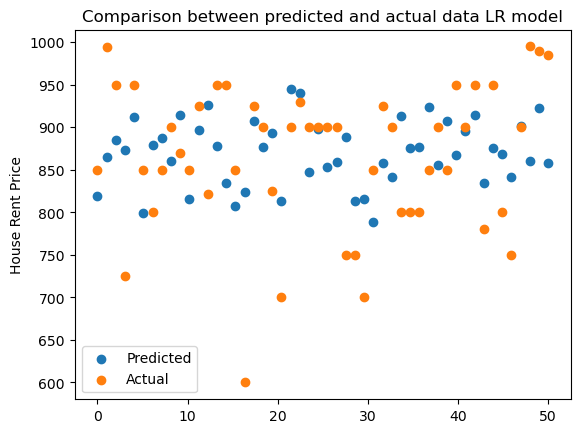

In [22]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_s = y_pred[:50]
y_test_s = y_test[:50]
x = np.linspace(0, len(y_pred_s),len(y_pred_s))

plt.scatter(x, y_pred_s, label='Predicted')
plt.scatter(x, y_test_s, label='Actual')
plt.ylabel("House Rent Price")
plt.legend()
plt.title("Comparison between predicted and actual data LR model")
plt.show()

## Training the Decision Tree Regression model on the Training set

R2: 0.82187161072377
MAE: 10.721153846153847
MSE: 1417.548076923077
RMSE: 37.65033966544096


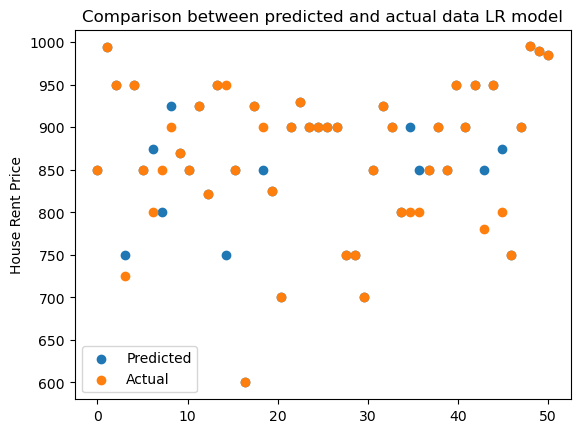

In [23]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_test, y_pred)

y_pred_s = y_pred[:50]
y_test_s = y_test[:50]
x = np.linspace(0, len(y_pred_s),len(y_pred_s))

plt.scatter(x, y_pred_s, label='Predicted')
plt.scatter(x, y_test_s, label='Actual')
plt.ylabel("House Rent Price")
plt.legend()
plt.title("Comparison between predicted and actual data LR model")
plt.show()

## Visualizing the Decision Tree

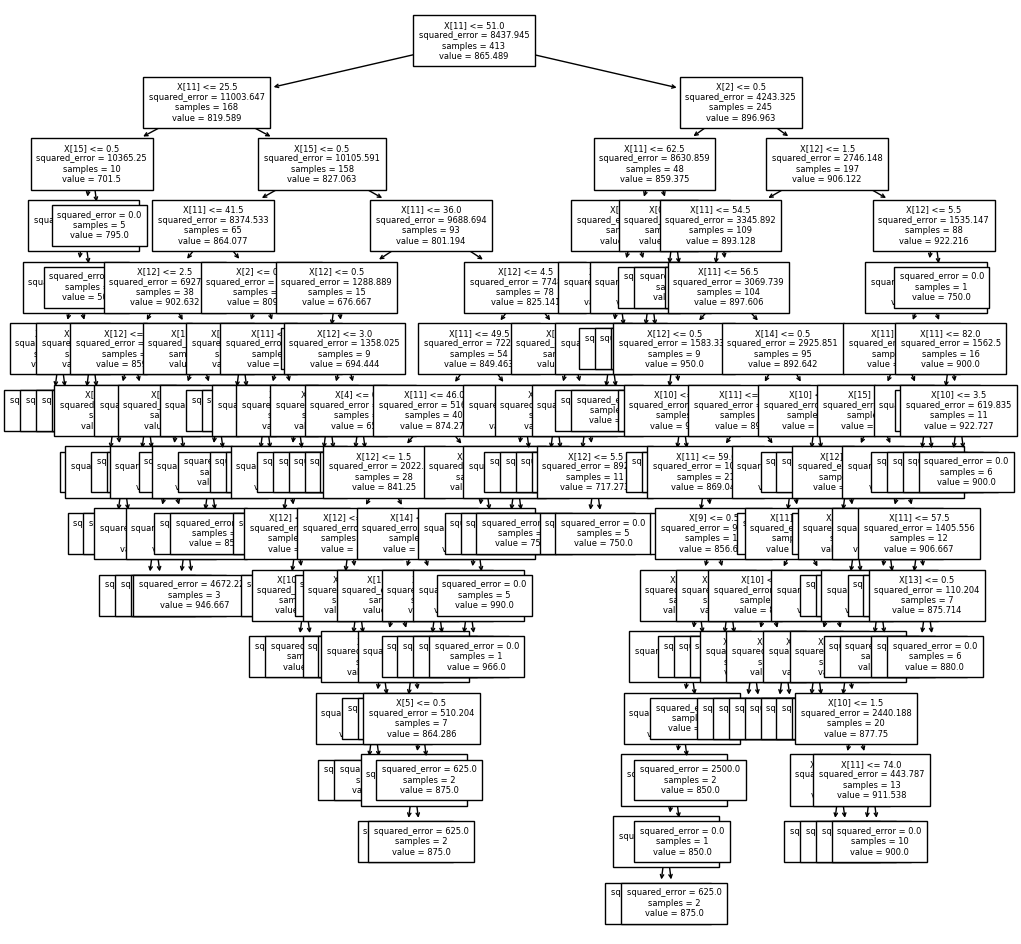

In [24]:
from sklearn import tree

plt.figure(figsize=(12, 12))
tree.plot_tree(regressor, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

## Training the Random Forest Regression model on the Training set

R2: 0.8727974392441441
MAE: 16.846780486874234
MSE: 1012.2796602597269
RMSE: 31.81634266001872


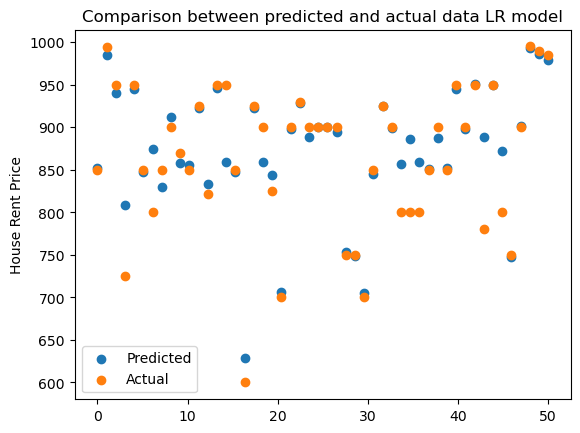

[0.01122066 0.02698312 0.03882745 0.03527649 0.00334334 0.0030202
 0.00276926 0.00666039 0.00561877 0.00240877 0.02969921 0.53817946
 0.18480373 0.02315751 0.03072706 0.05730457 0.        ]


In [25]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_test, y_pred)

y_pred_s = y_pred[:50]
y_test_s = y_test[:50]
x = np.linspace(0, len(y_pred_s),len(y_pred_s))

plt.scatter(x, y_pred_s, label='Predicted')
plt.scatter(x, y_test_s, label='Actual')
plt.ylabel("House Rent Price")
plt.legend()
plt.title("Comparison between predicted and actual data LR model")
plt.show()



fi1 = regressor.feature_importances_
print(fi1)

## Test with new data points

In [26]:
house_data = {'Rooms': [1], 'Squared_meters': [49], 'Floor': [3],'Type': ['Flat'],
     'Pool': [True],'Furniture': [False],'Exterior': [True],'Elevator': [True],'Distric': ['Malasaña']}

house_df = pd.DataFrame(data=house_data)
print(house_df)


# apply the same label binarizer transformation as was fitted on the data
house_df['Pool'] = labelbinarizer.transform(house_df['Pool'])
house_df['Exterior'] = labelbinarizer.transform(house_df['Exterior'])
house_df['Furniture'] = labelbinarizer.transform(house_df['Furniture'])
house_df['Elevator'] = labelbinarizer.transform(house_df['Elevator'])


# apply the same one hot encoding transformation as was fitted on the data
house_df_transformed = np.array(ct.transform(house_df))
print(house_df_transformed)


house_pred = regressor.predict(house_df_transformed)
print(house_pred)

   Rooms  Squared_meters  Floor  Type  Pool  Furniture  Exterior  Elevator  \
0      1              49      3  Flat  True      False      True      True   

    Distric  
0  Malasaña  
[[ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1. 49.  3.  1.  0.  1.  1.]]
[988.305]


## Find the best estimator with GridSearchCV

In [ ]:
param_grid = { 
    'n_estimators': [1000],
    'max_features': ['auto', 'sqrt', 'log2'],  
    #'max_depth' : [4,5,6,7,8],
    'criterion' :['squared_error', 'poisson']
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_rf_reg = grid_search.best_estimator_

y_pred = best_rf_reg.predict(X_test)

evaluate_model(y_test, y_pred)

## Performing Cross-fold validation

In [ ]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

from sklearn.model_selection import cross_val_score

regressor = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)

scoring_param = 'explained_variance'

scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring=scoring_param)
print("%0.2f %s with a standard deviation of %0.2f" % (scores.mean(), scoring_param, scores.std()))

## Normalize the data?

In [ ]:
from sklearn.preprocessing import MinMaxScaler


print(X[:10])

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

print(X[:10])

regressor = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring=scoring_param)
print("%0.2f %s with a standard deviation of %0.2f" % (scores.mean(), scoring_param, scores.std()))